# ベイズ


---

## ベイズ推定

事後分布を求める．  
あるデータが得られた時のパラメータの分布$p(\theta|x)$を求める．

ベイズの定理を用いて以下の式を得る．

$$
p(\theta|x) = \frac{p(x|\theta) p(\theta)}{p(x)}
$$

- $p(\theta)$  
パラメータの分布．事前分布と呼ぶ．  
これは**主観確率**として扱う．判断材料があればそれを元に事前分布を決める．特にない場合は一様分布の様な無情報事前分布を用いる．また**共役事前分布**と呼ばれる分布を設定できると後々計算しやすい．

- $p(x|\theta)$  
尤度（分布）．

- $p(x)$  
データの分布．次の様に周辺化できるため，**周辺尤度（分布）** と呼ぶ．  
$p(x) = \sum_{\theta} p(x|\theta) p(\theta)$  
確率分布の総和を1にするための定数項として用いるため**規格化定数**とも呼ぶ．

上の問題1を解いてみる．

> 箱の中に10個の玉がある．玉の色は赤か白のいずれかである．  
箱の中からランダムに玉を取り出し，色を確認してから戻す．これを10回繰り返した．  
その結果，赤玉が3回，白玉が7回出てきた．さあ，箱の中には赤玉が何個あるだろうか．

先ほど同様，赤が出た回数を$x$とする．$x$は確率$\theta$，$n=10$の二項分布に従う．  
そして$\theta$の分布をベイズ推定で求める．

<br>

まず事前分布を設定する．今回は特に判断材料がないので一様分布を用いる．  

$$
p(\theta) = 1 \quad (0 \leq \theta \leq 1)
$$

次に尤度を求める．

$$
p(x|\theta) = {}_n C_x \theta^x (1-\theta)^{n-x}
$$

最後に周辺尤度を求める．

$$
p(x) = \int_{0}^{1} p(x|\theta) p(\theta) \, d\theta
$$

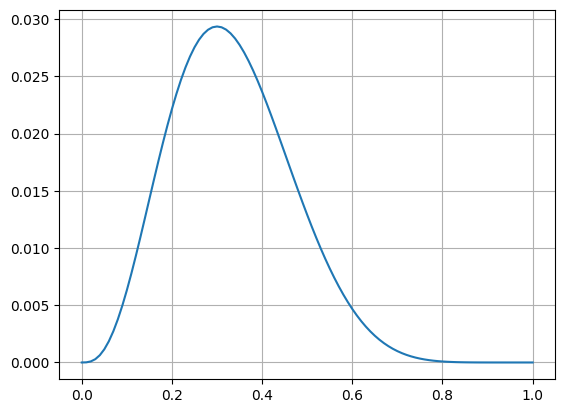

In [29]:
x = torch.tensor(3) # 実測値
n = 10 # 試行回数

prior = 1 # 事前分布

p = torch.arange(0, 1 + 0.01, 0.01)
binomal = dist.Binomial(10, p)
likelihood = binomal.log_prob(x).exp() # 尤度

margin = (likelihood * prior).sum() # 周辺尤度

posterior = likelihood * prior / margin # 事後分布

plt.plot(p, posterior)
plt.grid();

最尤推定の時とほぼ同じだが，一応$\theta$の分布が得られた．0.3が最も高い．

上のプログラムでは，周辺尤度を求める際，$\theta$を離散化して一つ一つ尤度を求め，その総和を計算している．  
ただやはり計算量が増えるため，このやり方が使えない場面が存在する．あと共役事前分布を設定できなかった場合なんかも計算ができない．

そんな時に使う手法が2つある．
- MCMC法
- 変分推論


---

## MCMC法

マルコフ連鎖モンテカルロ法（*Markov Chain Monte Carlo Method*)

求めたい事後分布に従う数列を生成する方法．色々方法がある．

- メトロポリス・ヘイスティング法
- ハミルトニアン・モンテカルロ法
- ギブズサンプリング
- スライスサンプリング


---

## 変分推論

変分ベイズとも

事後分布$P(\theta|x$)を別の分布$q(\theta)$で近似する手法．